<a href="https://colab.research.google.com/github/shivansh2310/WQU-Files/blob/main/Group4426_Crypto_GWP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [ ]:
# List of cryptocurrencies in the portfolio
cryptos = ['BTC-USD', 'ETH-USD','BNB-USD']

# Downloading historical data for the cryptocurrencies
data = yf.download(cryptos, start='2020-01-01', end='2023-01-01')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [ ]:
data.head()

,BNB-USD,BTC-USD,ETH-USD
Date,,,
2020-01-01,13.689083,7200.174316,130.802002
2020-01-02,13.027011,6985.470215,127.410179
2020-01-03,13.660452,7344.884277,134.171707
2020-01-04,13.891512,7410.656738,135.069366
2020-01-05,14.111019,7411.317383,136.276779


In [ ]:
# Calculating daily returns for the cryptocurrencies
returns = data.pct_change().dropna()
returns.head()

,BNB-USD,BTC-USD,ETH-USD
Date,,,
2020-01-02,-0.048365,-0.029819,-0.025931
2020-01-03,0.048625,0.051452,0.053069
2020-01-04,0.016915,0.008955,0.006690
2020-01-05,0.015802,0.000089,0.008939
2020-01-06,0.060009,0.048291,0.058905


In [ ]:
# Calculating daily returns
returns = data.pct_change()

# Portfolio composition weights
weights = [1/3, 1/3, 1/3]  # Equal weights for simplicity

# Calculating mean return in percentage
mean_return = returns.mean() * 100

# Calculating standard deviation in percentage
std_deviation = returns.std() * 100

# Calculating portfolio mean return
portfolio_mean_return = np.dot(mean_return, weights)

# Calculating portfolio standard deviation
portfolio_std_deviation = np.sqrt(np.dot(weights, np.dot(returns.cov(), weights))) * 100

# Calculating skewness and kurtosis
portfolio_skewness = skew(returns.dot(weights).dropna())
portfolio_kurtosis = kurtosis(returns.dot(weights).dropna())

# Calculating Sharpe ratio (assuming risk-free rate is 0 for simplicity)
portfolio_sharpe_ratio = portfolio_mean_return / portfolio_std_deviation

# Output
print("Portfolio Mean Return (%):", portfolio_mean_return)
print("Portfolio Standard Deviation (%):", portfolio_std_deviation)
print("Portfolio Skewness:", portfolio_skewness)
print("Portfolio Kurtosis:", portfolio_kurtosis)
print("Portfolio Sharpe Ratio:", portfolio_sharpe_ratio)

Portfolio Mean Return (%): 0.3018593641932984
Portfolio Standard Deviation (%): 4.382153397152359
Portfolio Skewness: -0.6953128353622477
Portfolio Kurtosis: 10.235160037687729
Portfolio Sharpe Ratio: 0.06888379680854047


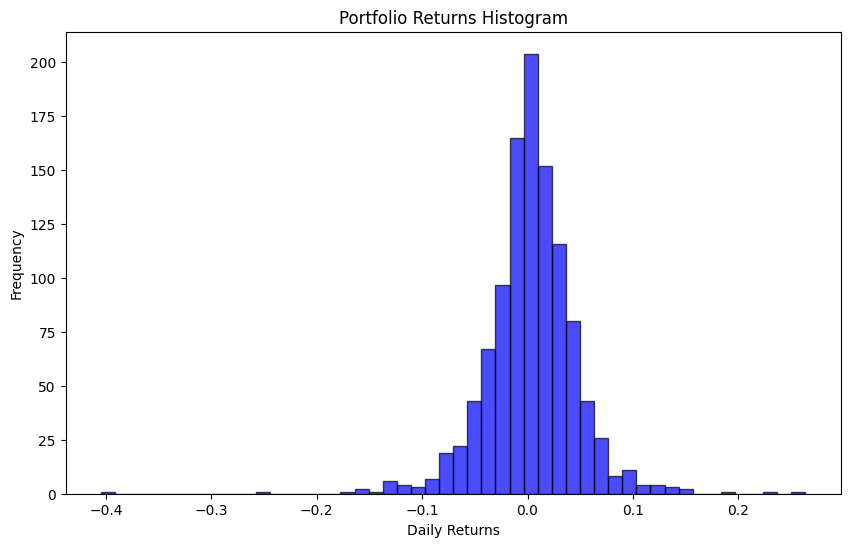

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of portfolio returns
portfolio_returns = returns.dot(weights)
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.title('Portfolio Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()
